In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import bpl


In [10]:
from wcpredictor.src.bpl_interface import WCPred
from wcpredictor.src.utils import get_and_train_model

- fit up to end of 2020
- test on 2021 and 2022
- no covariates

In [9]:
r = get_results_data()
r

Using FIFA organisation rankings


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2018-06-02,El Salvador,Honduras,1,0,Friendly,Houston,USA,True
1,2018-06-02,Thailand,China PR,0,2,Friendly,Bangkok,Thailand,False
2,2018-06-02,England,Nigeria,2,1,Friendly,London,England,False
3,2018-06-02,Montenegro,Slovenia,0,2,Friendly,Podgorica,Montenegro,False
4,2018-06-02,Mexico,Scotland,1,0,Friendly,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
3723,2022-10-22,Saudi Arabia,North Macedonia,1,0,Friendly,Abu Dhabi,United Arab Emirates,True
3724,2022-10-23,Qatar,Guatemala,2,0,Friendly,Málaga,Spain,True
3725,2022-10-26,Saudi Arabia,Albania,1,1,Friendly,Abu Dhabi,United Arab Emirates,True
3726,2022-10-27,Qatar,Honduras,1,0,Friendly,Marbella,Spain,True


In [3]:
results = pd.read_csv('../wcpredictor/data/results.csv', parse_dates=['date'])


def filter_results(year_from, year_until, teams=None):
    r = results[(results.date.dt.year >= year_from) & (results.date.dt.year <= year_until)]
    if teams:
        r = r[(r["home_team"].isin(teams)) & (r["away_team"].isin(teams))]
    return r

def fit_model_between(model, year_from, year_until):
    r = filter_results(year_from, year_until)
    wc_pred = WCPred(results = r)
    wc_pred.fit_model(model=model)
    return wc_pred.model


def test_model_between(model, year_from, year_until):
    r = filter_results(year_from, year_until, model.teams)
    if isinstance(model, bpl.NeutralDixonColesMatchPredictor):
        proba = model.predict_score_proba(
            np.array(r["home_team"]),
            np.array(r["away_team"]),
            np.array(r["home_score"]),
            np.array(r["away_score"]),
            np.array(r["neutral"]),
        )
    else:
        proba = model.predict_score_proba(
            np.array(r["home_team"]),
            np.array(r["away_team"]),
            np.array(r["home_score"]),
            np.array(r["away_score"]),
        )
    return np.log(proba).sum() / len(proba)  # log likelihood


In [4]:
years = [
    1872, 1900, 1925, 1950, 1975, 2000,
    2004, 2008, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018, 2019,
    2020
]
train_until = 2020
test_from = 2021
test_until = 2022

models = [
    bpl.DixonColesMatchPredictor(),
    bpl.ExtendedDixonColesMatchPredictor(),
    bpl.NeutralDixonColesMatchPredictor()
]
likelihoods = {}

for model in models:
    key = type(model)
    print(key)
    likelihoods[key] = []
    for y in years:
        print("=======")
        print(y)
        print("=======")
        model = fit_model_between(model, y, train_until)
        likelihoods[key].append(test_model_between(model, test_from, test_until))


<class 'bpl.dixon_coles.DixonColesMatchPredictor'>
1872
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:14<00:00,  7.70it/s, 127 steps of size 3.80e-02. acc. prob=0.93]


1900
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:59<00:00,  8.37it/s, 127 steps of size 3.91e-02. acc. prob=0.93]


1925
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:04<00:00, 12.09it/s, 63 steps of size 6.18e-02. acc. prob=0.92]


1950
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:57<00:00, 12.76it/s, 63 steps of size 6.10e-02. acc. prob=0.94]


1975
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:36<00:00, 15.58it/s, 63 steps of size 5.67e-02. acc. prob=0.93]


2000
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 35.98it/s, 31 steps of size 1.02e-01. acc. prob=0.91]


2004
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:36<00:00, 41.38it/s, 31 steps of size 9.68e-02. acc. prob=0.94]


2008
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:26<00:00, 55.96it/s, 31 steps of size 9.63e-02. acc. prob=0.91]


2010
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:23<00:00, 64.53it/s, 31 steps of size 9.88e-02. acc. prob=0.92]


2011
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:22<00:00, 66.23it/s, 31 steps of size 1.29e-01. acc. prob=0.91]


2012
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:18<00:00, 79.49it/s, 31 steps of size 1.03e-01. acc. prob=0.93]


2013
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:17<00:00, 84.55it/s, 31 steps of size 1.20e-01. acc. prob=0.91]


2014
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:15<00:00, 95.55it/s, 31 steps of size 1.23e-01. acc. prob=0.92]


2015
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:13<00:00, 110.30it/s, 31 steps of size 1.41e-01. acc. prob=0.92]


2016
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:11<00:00, 132.28it/s, 31 steps of size 1.42e-01. acc. prob=0.91]


2017
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:09<00:00, 151.89it/s, 31 steps of size 2.01e-01. acc. prob=0.88]


2018
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:08<00:00, 181.42it/s, 31 steps of size 1.77e-01. acc. prob=0.90]


2019
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 234.64it/s, 15 steps of size 2.30e-01. acc. prob=0.87]


2020
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:05<00:00, 286.60it/s, 15 steps of size 2.63e-01. acc. prob=0.89]


<class 'bpl.extended_dixon_coles.ExtendedDixonColesMatchPredictor'>
1872
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:13<00:00, 11.20it/s, 63 steps of size 7.11e-02. acc. prob=0.91]


1900
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:06<00:00, 11.87it/s, 63 steps of size 8.01e-02. acc. prob=0.89]


1925
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:58<00:00, 12.66it/s, 63 steps of size 9.98e-02. acc. prob=0.87]


1950
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:08<00:00, 11.64it/s, 63 steps of size 9.28e-02. acc. prob=0.90]


1975
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:20<00:00, 18.66it/s, 31 steps of size 1.03e-01. acc. prob=0.90]


2000
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:46<00:00, 32.46it/s, 31 steps of size 9.86e-02. acc. prob=0.90]


2004
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:48<00:00, 31.17it/s, 31 steps of size 1.31e-01. acc. prob=0.88]


2008
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:33<00:00, 44.34it/s, 31 steps of size 1.11e-01. acc. prob=0.89]


2010
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:28<00:00, 52.38it/s, 31 steps of size 1.20e-01. acc. prob=0.89]


2011
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:28<00:00, 52.08it/s, 31 steps of size 1.12e-01. acc. prob=0.90]


2012
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:26<00:00, 55.83it/s, 31 steps of size 1.61e-01. acc. prob=0.84]


2013
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:23<00:00, 63.18it/s, 31 steps of size 1.37e-01. acc. prob=0.88]


2014
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:19<00:00, 76.60it/s, 31 steps of size 1.50e-01. acc. prob=0.87]


2015
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:17<00:00, 86.34it/s, 31 steps of size 1.33e-01. acc. prob=0.85]


2016
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:15<00:00, 97.40it/s, 31 steps of size 1.21e-01. acc. prob=0.93]


2017
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:12<00:00, 116.31it/s, 31 steps of size 1.47e-01. acc. prob=0.90]


2018
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:10<00:00, 136.57it/s, 31 steps of size 1.41e-01. acc. prob=0.89]


2019
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:09<00:00, 151.63it/s, 31 steps of size 1.48e-01. acc. prob=0.91]


2020
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:06<00:00, 220.91it/s, 31 steps of size 1.13e-01. acc. prob=0.93]


<class 'bpl.neutral_dixon_coles.NeutralDixonColesMatchPredictor'>
1872
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:30<00:00,  7.13it/s, 63 steps of size 8.73e-02. acc. prob=0.88]


1900
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:41<00:00,  6.78it/s, 63 steps of size 7.14e-02. acc. prob=0.91]


1925
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:26<00:00,  7.26it/s, 63 steps of size 6.36e-02. acc. prob=0.92]


1950
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [03:39<00:00,  6.83it/s, 63 steps of size 7.27e-02. acc. prob=0.88]


1975
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [02:48<00:00,  8.89it/s, 63 steps of size 7.47e-02. acc. prob=0.89]


2000
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:50<00:00, 13.56it/s, 63 steps of size 9.31e-02. acc. prob=0.90]


2004
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [01:09<00:00, 21.67it/s, 31 steps of size 1.44e-01. acc. prob=0.83]


2008
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:50<00:00, 29.88it/s, 31 steps of size 1.51e-01. acc. prob=0.84]


2010
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:45<00:00, 33.31it/s, 31 steps of size 1.40e-01. acc. prob=0.86]


2011
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:43<00:00, 34.20it/s, 31 steps of size 1.35e-01. acc. prob=0.88]


2012
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:41<00:00, 36.10it/s, 31 steps of size 1.42e-01. acc. prob=0.85]


2013
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:36<00:00, 40.81it/s, 31 steps of size 1.30e-01. acc. prob=0.87]


2014
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:32<00:00, 45.72it/s, 31 steps of size 1.62e-01. acc. prob=0.84]


2015
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:29<00:00, 50.97it/s, 31 steps of size 1.46e-01. acc. prob=0.88]


2016
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:28<00:00, 53.06it/s, 31 steps of size 1.52e-01. acc. prob=0.88]


2017
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:23<00:00, 62.63it/s, 31 steps of size 1.29e-01. acc. prob=0.92]


2018
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:19<00:00, 76.05it/s, 31 steps of size 1.18e-01. acc. prob=0.89]


2019
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:15<00:00, 96.18it/s, 31 steps of size 1.50e-01. acc. prob=0.86]


2020
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:08<00:00, 175.96it/s, 31 steps of size 1.26e-01. acc. prob=0.92]


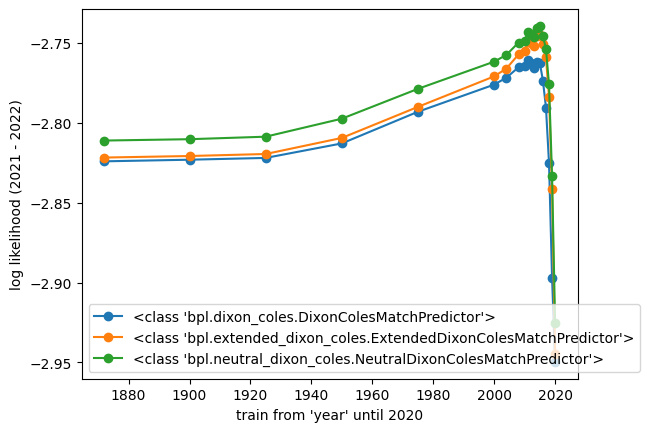

In [5]:
for mod, lik in likelihoods.items():
    plt.plot(years, lik, "o-", label=mod)
plt.xlabel(f"train from 'year' until {train_until}")
plt.ylabel(f"log likelihood ({test_from} - {test_until})")
plt.legend()

In [6]:
pd.DataFrame(likelihoods, index=years)

,<class 'bpl.dixon_coles.DixonColesMatchPredictor'>,<class 'bpl.extended_dixon_coles.ExtendedDixonColesMatchPredictor'>,<class 'bpl.neutral_dixon_coles.NeutralDixonColesMatchPredictor'>
1872,-2.824064,-2.821698,-2.811049
1900,-2.823049,-2.820734,-2.810201
1925,-2.821930,-2.819475,-2.808629
1950,-2.812845,-2.809403,-2.797350
1975,-2.792987,-2.789935,-2.778640
2000,-2.776008,-2.770831,-2.761619
2004,-2.771686,-2.765967,-2.757417
2008,-2.765140,-2.757063,-2.749652
2010,-2.764656,-2.754939,-2.748580
2011,-2.760553,-2.749340,-2.743253


Max likelihood at 2015, i.e. when training with 6 full years of data.

So for World Cup 2022 may want to include 2016-2022 results.